In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
names1880 = pd.read_csv('./names/yob1880.txt', names=['name', 'sex', 'births'])

In [4]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [5]:
names1880.groupby('sex').births.sum()

sex
F     90992
M    110490
Name: births, dtype: int64

In [6]:
# 2010 is the last available year right now
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [7]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [8]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [9]:
total_births.tail()

sex,F,M
year,,
2006,1898776,2052652
2007,1919775,2072505
2008,1887660,2036750
2009,1833461,1979895
2010,1773440,1914629


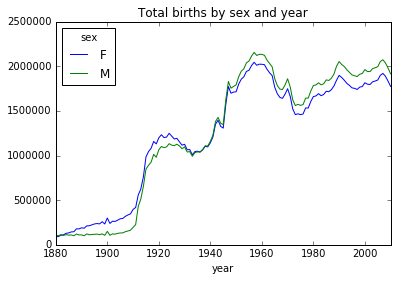

In [10]:
total_births.plot(title='Total births by sex and year')

In [11]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

In [12]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [13]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [14]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [15]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [16]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [17]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [18]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [19]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [20]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D4C10F0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E5A4C88>], dtype=object)

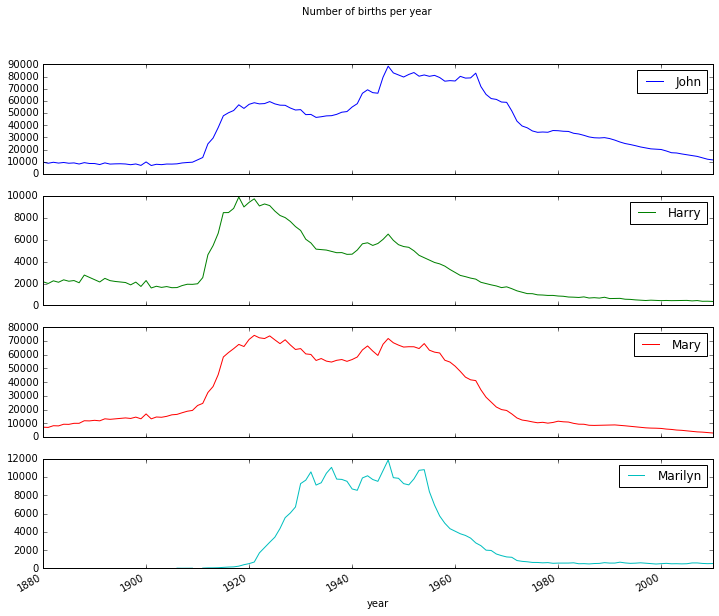

In [21]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [22]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

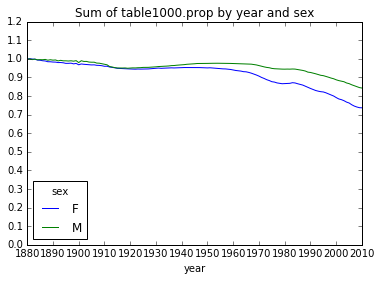

In [23]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [24]:
df = boys[boys.year == 2010]

In [25]:
df

,name,sex,births,year,prop
260877,Jacob,M,22095,2010,0.011540
260878,Ethan,M,17993,2010,0.009398
260879,Michael,M,17324,2010,0.009048
260880,Jayden,M,17158,2010,0.008962
260881,William,M,17036,2010,0.008898
260882,Alexander,M,16746,2010,0.008746
260883,Noah,M,16438,2010,0.008585
260884,Daniel,M,15819,2010,0.008262
260885,Aiden,M,15520,2010,0.008106
260886,Anthony,M,15475,2010,0.008083


In [26]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [27]:
prop_cumsum[:10]

260877    0.011540
260878    0.020938
260879    0.029986
260880    0.038947
260881    0.047845
260882    0.056592
260883    0.065177
260884    0.073439
260885    0.081545
260886    0.089628
Name: prop, dtype: float64

In [28]:
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [29]:
df = boys[boys.year == 1900]

In [30]:
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()

In [31]:
in1900.searchsorted(0.5) + 1

array([25], dtype=int64)

In [32]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [33]:
diversity.head()

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]


In [34]:
diversity.plot(title="Number of popular names in top 50%")

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [ ]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [ ]:
subtable.head()

In [ ]:
subtable.sum()

In [ ]:
letter_prop = subtable / subtable.sum().astype(float)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)

In [ ]:
letter_prop = table / table.sum().astype(float)

In [ ]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

In [ ]:
dny_ts.head()

In [ ]:
dny_ts.plot()

In [ ]:
all_names = top1000.name.unique()

In [ ]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [ ]:
lesley_like = all_names[mask]

In [ ]:
lesley_like

In [ ]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [ ]:
filtered.groupby('name').births.sum()

In [ ]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [ ]:
table = table.div(table.sum(1), axis=0)

In [ ]:
table.tail()

In [ ]:
table.plot(style={'M': 'k-', 'F': 'k--'})

In [ ]:
names1880